In [1]:
!pip install tensorflow tensorflow-gpu opencv-python mediapipe sklearn matplotlib

In [75]:
!pip install pyttsx3

  Using cached pyttsx3-2.90-py3-none-any.whl (39 kB)
     -------------------------------------- 184.3/184.3 kB 2.2 MB/s eta 0:00:00
  Using cached pypiwin32-223-py3-none-any.whl (1.7 kB)


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

2

In [2]:
mp_holistic = mp.solutions.holistic # mo hinh toan dien
mp_drawing = mp.solutions.drawing_utils # Tien ich ve cua mp

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # CHUYEN DOI MAU BGR 2 RGB
    image.flags.writeable = False                  # Hinh anh hien khong ghi duoc
    results = model.process(image)                 # DUA RA DU DOAN
    image.flags.writeable = True                   # Hinh anh hien co the ghi duoc
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # CHUYEN DOI MAU RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right 

In [5]:
def draw_styled_landmarks(image, results):
     # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), #line
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1) #Point
                             )
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )
    # Draw right 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )  

In [18]:
mp_drawing.draw_landmarks??

In [7]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, image = cap.read()
     # Show
    cv2.imshow("OpenCV Feed", image)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [6]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Make dectections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Show
        cv2.imshow("OpenCV Feed", image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
len(results.left_hand_landmarks.landmark)

21

In [10]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame, results)

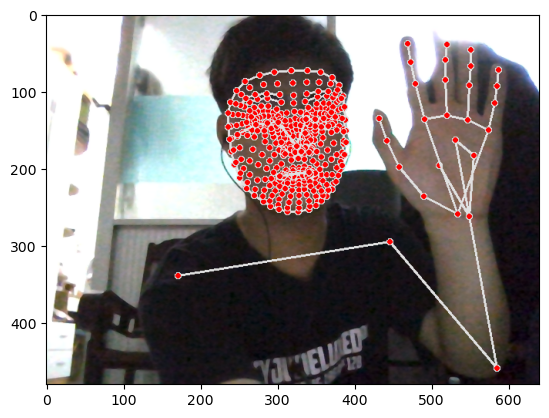

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

3. Extract

In [11]:
len(results.pose_landmarks.landmark)

33

In [8]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [30]:
pose = np.array([[res.x, res.y, res. z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res. z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(21*3)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
face = np.array([[res.x, res.y, res. z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [9]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res. z, res.visibility] 
                     for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res. z] 
                     for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] 
                for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] 
                for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:
result_test = extract_keypoints(results) # shape: 486*3 + 33*4 + 21*3 + 21*3 = 1662

In [15]:
result_test

array([ 0.5204401 ,  0.43402335, -1.09438324, ...,  0.        ,
        0.        ,  0.        ])

In [18]:
np.save('0', result_test)

In [19]:
np.load('0.npy')

array([ 0.4144339 ,  0.63508666, -0.91731465, ...,  0.        ,
        0.        ,  0.        ])

4. Setup folders

In [10]:
# Đường dẫn cho dữ liệu đã xuất
DATA_PATH = os.path.join('MP_Data') 

# Các hành động mà chúng tôi cố gắng phát hiện
actions = np.array(['A','B', 'C', 'D'])

# 30 video có giá trị dữ liệu
no_sequences = 30

# Video sẽ có độ dài 30 khung hình
sequence_length = 30

In [107]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

5. Colect keypoint values 

In [108]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # loop through action
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                   
                ret, frame = cap.read()

                # Make dectections
                image, results = mediapipe_detection(frame, holistic)
                print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # New apply wait logic 
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show
                    cv2.imshow("OpenCV Feed", image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                # Press the button q to exit
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
            
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [19]:
cap.release()
cv2.destroyAllWindows()

6. Preprocess Data and Create Labels and Features

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [12]:
label_map = {label:num for num, label in enumerate(actions)}

In [13]:
label_map

{'A': 0, 'B': 1, 'C': 2, 'D': 3}

In [14]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [84]:
np.array(sequences).shape

(450, 30, 1662)

In [85]:
np.array(labels).shape

(450,)

In [15]:
X = np.array(sequences)

In [87]:
X.shape

(450, 30, 1662)

In [16]:
y = to_categorical(labels).astype(int)

In [48]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [33]:
y_test.shape

(11, 7)

7. Build and train lstm Neural Network

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [19]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [20]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [92]:
res = [.7,0.2,0.1]

In [93]:
actions[np.argmax(res)]

'A'

In [21]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [124]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
4/4 [==============================] - 3s 142ms/step - loss: 1.6506 - categorical_accuracy: 0.2368
Epoch 2/2000
4/4 [==============================] - 1s 124ms/step - loss: 1.5402 - categorical_accuracy: 0.2193
Epoch 3/2000
4/4 [==============================] - 1s 132ms/step - loss: 2.0748 - categorical_accuracy: 0.2895
Epoch 4/2000
4/4 [==============================] - 1s 132ms/step - loss: 2.2366 - categorical_accuracy: 0.2544
Epoch 5/2000
4/4 [==============================] - 1s 132ms/step - loss: 1.4274 - categorical_accuracy: 0.3070
Epoch 6/2000
4/4 [==============================] - 1s 124ms/step - loss: 1.3969 - categorical_accuracy: 0.2719
Epoch 7/2000
4/4 [==============================] - 1s 127ms/step - loss: 1.3873 - categorical_accuracy: 0.2281
Epoch 8/2000
4/4 [==============================] - 1s 129ms/step - loss: 1.3916 - categorical_accuracy: 0.2018
Epoch 9/2000
4/4 [==============================] - 1s 140ms/step - loss: 1.3812 - categorical_accuracy:

4/4 [==============================] - 1s 125ms/step - loss: 1.3805 - categorical_accuracy: 0.2456
Epoch 146/2000
4/4 [==============================] - 1s 127ms/step - loss: 1.3801 - categorical_accuracy: 0.2456
Epoch 147/2000
4/4 [==============================] - 1s 125ms/step - loss: 1.3790 - categorical_accuracy: 0.2456
Epoch 148/2000
4/4 [==============================] - 1s 124ms/step - loss: 1.3785 - categorical_accuracy: 0.2456
Epoch 149/2000
4/4 [==============================] - 1s 127ms/step - loss: 1.3768 - categorical_accuracy: 0.2456
Epoch 150/2000
4/4 [==============================] - 1s 125ms/step - loss: 1.3748 - categorical_accuracy: 0.2456
Epoch 151/2000
4/4 [==============================] - 1s 128ms/step - loss: 1.3722 - categorical_accuracy: 0.2456
Epoch 152/2000
4/4 [==============================] - 1s 125ms/step - loss: 1.3717 - categorical_accuracy: 0.1930
Epoch 153/2000
4/4 [==============================] - 1s 127ms/step - loss: 1.3651 - categorical_accura

Epoch 217/2000
4/4 [==============================] - 1s 141ms/step - loss: 1.3907 - categorical_accuracy: 0.2544
Epoch 218/2000
4/4 [==============================] - 1s 129ms/step - loss: 1.3903 - categorical_accuracy: 0.2544
Epoch 219/2000
4/4 [==============================] - 1s 144ms/step - loss: 1.3900 - categorical_accuracy: 0.2544
Epoch 220/2000
4/4 [==============================] - 1s 134ms/step - loss: 1.3897 - categorical_accuracy: 0.2544
Epoch 221/2000
4/4 [==============================] - 1s 142ms/step - loss: 1.3896 - categorical_accuracy: 0.2544
Epoch 222/2000
4/4 [==============================] - 1s 126ms/step - loss: 1.3893 - categorical_accuracy: 0.2544
Epoch 223/2000
4/4 [==============================] - 1s 129ms/step - loss: 1.3892 - categorical_accuracy: 0.2544
Epoch 224/2000
4/4 [==============================] - 1s 127ms/step - loss: 1.3887 - categorical_accuracy: 0.2544
Epoch 225/2000
4/4 [==============================] - 1s 138ms/step - loss: 1.3886 - cat

Epoch 360/2000
4/4 [==============================] - 1s 141ms/step - loss: 1.3862 - categorical_accuracy: 0.2544
Epoch 361/2000
4/4 [==============================] - 1s 140ms/step - loss: 1.3862 - categorical_accuracy: 0.2544
Epoch 362/2000
4/4 [==============================] - 1s 142ms/step - loss: 1.3862 - categorical_accuracy: 0.2544
Epoch 363/2000
4/4 [==============================] - 1s 138ms/step - loss: 1.3862 - categorical_accuracy: 0.2544
Epoch 364/2000
4/4 [==============================] - 1s 141ms/step - loss: 1.3862 - categorical_accuracy: 0.2544
Epoch 365/2000
4/4 [==============================] - 1s 137ms/step - loss: 1.3861 - categorical_accuracy: 0.2544
Epoch 366/2000
4/4 [==============================] - 1s 146ms/step - loss: 1.3861 - categorical_accuracy: 0.2544
Epoch 367/2000
4/4 [==============================] - 1s 138ms/step - loss: 1.3862 - categorical_accuracy: 0.2544
Epoch 368/2000
4/4 [==============================] - 1s 138ms/step - loss: 1.3861 - cat

Epoch 503/2000
4/4 [==============================] - 1s 136ms/step - loss: 1.3862 - categorical_accuracy: 0.2544
Epoch 504/2000
4/4 [==============================] - 1s 136ms/step - loss: 1.3862 - categorical_accuracy: 0.2544
Epoch 505/2000
4/4 [==============================] - 1s 138ms/step - loss: 1.3862 - categorical_accuracy: 0.2544
Epoch 506/2000
4/4 [==============================] - 1s 129ms/step - loss: 1.3862 - categorical_accuracy: 0.2544
Epoch 507/2000
4/4 [==============================] - 1s 140ms/step - loss: 1.3861 - categorical_accuracy: 0.2544
Epoch 508/2000
4/4 [==============================] - 1s 137ms/step - loss: 1.3862 - categorical_accuracy: 0.2544
Epoch 509/2000
4/4 [==============================] - 1s 129ms/step - loss: 1.3862 - categorical_accuracy: 0.2544
Epoch 510/2000
4/4 [==============================] - 1s 125ms/step - loss: 1.3862 - categorical_accuracy: 0.2544
Epoch 511/2000
4/4 [==============================] - 1s 130ms/step - loss: 1.3861 - cat

Epoch 646/2000
4/4 [==============================] - 1s 127ms/step - loss: 1.3861 - categorical_accuracy: 0.2544
Epoch 647/2000
4/4 [==============================] - 1s 124ms/step - loss: 1.3862 - categorical_accuracy: 0.2544
Epoch 648/2000
4/4 [==============================] - 1s 124ms/step - loss: 1.3862 - categorical_accuracy: 0.2544
Epoch 649/2000
4/4 [==============================] - 1s 126ms/step - loss: 1.3861 - categorical_accuracy: 0.2544
Epoch 650/2000
4/4 [==============================] - 1s 122ms/step - loss: 1.3862 - categorical_accuracy: 0.2544
Epoch 651/2000
4/4 [==============================] - 1s 123ms/step - loss: 1.3862 - categorical_accuracy: 0.2544
Epoch 652/2000
4/4 [==============================] - 1s 123ms/step - loss: 1.3861 - categorical_accuracy: 0.2544
Epoch 653/2000
4/4 [==============================] - 1s 124ms/step - loss: 1.3861 - categorical_accuracy: 0.2544
Epoch 654/2000
4/4 [==============================] - 0s 122ms/step - loss: 1.3862 - cat

Epoch 789/2000
4/4 [==============================] - 1s 125ms/step - loss: 1.4077 - categorical_accuracy: 0.2544
Epoch 790/2000
4/4 [==============================] - 1s 131ms/step - loss: 1.3997 - categorical_accuracy: 0.2544
Epoch 791/2000
4/4 [==============================] - 1s 126ms/step - loss: 1.3928 - categorical_accuracy: 0.2544
Epoch 792/2000
4/4 [==============================] - 1s 126ms/step - loss: 1.3885 - categorical_accuracy: 0.2544
Epoch 793/2000
4/4 [==============================] - 1s 134ms/step - loss: 1.3810 - categorical_accuracy: 0.2544
Epoch 794/2000
4/4 [==============================] - 1s 126ms/step - loss: 1.3759 - categorical_accuracy: 0.3509
Epoch 795/2000
4/4 [==============================] - 1s 132ms/step - loss: 1.3748 - categorical_accuracy: 0.3246
Epoch 796/2000
4/4 [==============================] - 1s 129ms/step - loss: 1.3700 - categorical_accuracy: 0.2807
Epoch 797/2000
4/4 [==============================] - 1s 130ms/step - loss: 1.3651 - cat

Epoch 932/2000
4/4 [==============================] - 1s 125ms/step - loss: 1.3848 - categorical_accuracy: 0.2807
Epoch 933/2000
4/4 [==============================] - 1s 132ms/step - loss: 1.3847 - categorical_accuracy: 0.3772
Epoch 934/2000
4/4 [==============================] - 1s 125ms/step - loss: 1.3845 - categorical_accuracy: 0.3772
Epoch 935/2000
4/4 [==============================] - 1s 126ms/step - loss: 1.3844 - categorical_accuracy: 0.4035
Epoch 936/2000
4/4 [==============================] - 1s 124ms/step - loss: 1.3839 - categorical_accuracy: 0.3509
Epoch 937/2000
4/4 [==============================] - 1s 127ms/step - loss: 1.3842 - categorical_accuracy: 0.2895
Epoch 938/2000
4/4 [==============================] - 1s 123ms/step - loss: 1.3833 - categorical_accuracy: 0.2544
Epoch 939/2000
4/4 [==============================] - 1s 125ms/step - loss: 1.3832 - categorical_accuracy: 0.3596
Epoch 940/2000
4/4 [==============================] - 0s 121ms/step - loss: 1.3831 - cat

4/4 [==============================] - 1s 126ms/step - loss: 0.6868 - categorical_accuracy: 0.6316
Epoch 1075/2000
4/4 [==============================] - 1s 122ms/step - loss: 0.6320 - categorical_accuracy: 0.7193
Epoch 1076/2000
4/4 [==============================] - 1s 124ms/step - loss: 0.5951 - categorical_accuracy: 0.6842
Epoch 1077/2000
4/4 [==============================] - 1s 125ms/step - loss: 0.6058 - categorical_accuracy: 0.7105
Epoch 1078/2000
4/4 [==============================] - 1s 124ms/step - loss: 0.6771 - categorical_accuracy: 0.6579
Epoch 1079/2000
4/4 [==============================] - 1s 123ms/step - loss: 0.7098 - categorical_accuracy: 0.6404
Epoch 1080/2000
4/4 [==============================] - 1s 124ms/step - loss: 0.8972 - categorical_accuracy: 0.5877
Epoch 1081/2000
4/4 [==============================] - 1s 124ms/step - loss: 0.7819 - categorical_accuracy: 0.6579
Epoch 1082/2000
4/4 [==============================] - 1s 125ms/step - loss: 0.7439 - categorica

4/4 [==============================] - 1s 127ms/step - loss: 0.2634 - categorical_accuracy: 0.8684
Epoch 1217/2000
4/4 [==============================] - 1s 126ms/step - loss: 0.3292 - categorical_accuracy: 0.8246
Epoch 1218/2000
4/4 [==============================] - 1s 151ms/step - loss: 0.4064 - categorical_accuracy: 0.8684
Epoch 1219/2000
4/4 [==============================] - 1s 137ms/step - loss: 0.3619 - categorical_accuracy: 0.7807
Epoch 1220/2000
4/4 [==============================] - 1s 138ms/step - loss: 0.3626 - categorical_accuracy: 0.8246
Epoch 1221/2000
4/4 [==============================] - 1s 136ms/step - loss: 0.2691 - categorical_accuracy: 0.8684
Epoch 1222/2000
4/4 [==============================] - 1s 133ms/step - loss: 0.2793 - categorical_accuracy: 0.8772
Epoch 1223/2000
4/4 [==============================] - 1s 131ms/step - loss: 0.2484 - categorical_accuracy: 0.8860
Epoch 1224/2000
4/4 [==============================] - 1s 133ms/step - loss: 0.2997 - categorica

4/4 [==============================] - 1s 125ms/step - loss: 0.1284 - categorical_accuracy: 0.9386
Epoch 1359/2000
4/4 [==============================] - 1s 125ms/step - loss: 0.1295 - categorical_accuracy: 0.9561
Epoch 1360/2000
4/4 [==============================] - 1s 125ms/step - loss: 0.1492 - categorical_accuracy: 0.9211
Epoch 1361/2000
4/4 [==============================] - 1s 127ms/step - loss: 0.1445 - categorical_accuracy: 0.9649
Epoch 1362/2000
4/4 [==============================] - 1s 125ms/step - loss: 0.1775 - categorical_accuracy: 0.9211
Epoch 1363/2000
4/4 [==============================] - 1s 125ms/step - loss: 0.1613 - categorical_accuracy: 0.9035
Epoch 1364/2000
4/4 [==============================] - 1s 125ms/step - loss: 0.1343 - categorical_accuracy: 0.9298
Epoch 1365/2000
4/4 [==============================] - 1s 125ms/step - loss: 0.1316 - categorical_accuracy: 0.9474
Epoch 1366/2000
4/4 [==============================] - 1s 123ms/step - loss: 0.2183 - categorica

4/4 [==============================] - 1s 126ms/step - loss: 0.0660 - categorical_accuracy: 0.9737
Epoch 1501/2000
4/4 [==============================] - 1s 128ms/step - loss: 0.0421 - categorical_accuracy: 0.9912
Epoch 1502/2000
4/4 [==============================] - 1s 126ms/step - loss: 0.0466 - categorical_accuracy: 0.9912
Epoch 1503/2000
4/4 [==============================] - 1s 126ms/step - loss: 0.0374 - categorical_accuracy: 0.9912
Epoch 1504/2000
4/4 [==============================] - 1s 124ms/step - loss: 0.0443 - categorical_accuracy: 0.9825
Epoch 1505/2000
4/4 [==============================] - 1s 126ms/step - loss: 0.0612 - categorical_accuracy: 0.9649
Epoch 1506/2000
4/4 [==============================] - 1s 127ms/step - loss: 0.1768 - categorical_accuracy: 0.9386
Epoch 1507/2000
4/4 [==============================] - 1s 125ms/step - loss: 0.0992 - categorical_accuracy: 0.9561
Epoch 1508/2000
4/4 [==============================] - 1s 128ms/step - loss: 0.0951 - categorica

4/4 [==============================] - 1s 141ms/step - loss: 0.0248 - categorical_accuracy: 0.9825
Epoch 1643/2000
4/4 [==============================] - 1s 137ms/step - loss: 0.0270 - categorical_accuracy: 0.9825
Epoch 1644/2000
4/4 [==============================] - 1s 137ms/step - loss: 0.0221 - categorical_accuracy: 0.9825
Epoch 1645/2000
4/4 [==============================] - 1s 135ms/step - loss: 0.0400 - categorical_accuracy: 0.9912
Epoch 1646/2000
4/4 [==============================] - 1s 136ms/step - loss: 0.0374 - categorical_accuracy: 0.9912
Epoch 1647/2000
4/4 [==============================] - 1s 137ms/step - loss: 0.0648 - categorical_accuracy: 0.9737
Epoch 1648/2000
4/4 [==============================] - 1s 139ms/step - loss: 0.1188 - categorical_accuracy: 0.9386
Epoch 1649/2000
4/4 [==============================] - 1s 138ms/step - loss: 0.1042 - categorical_accuracy: 0.9561
Epoch 1650/2000
4/4 [==============================] - 1s 143ms/step - loss: 0.0441 - categorica

4/4 [==============================] - 1s 124ms/step - loss: 0.0103 - categorical_accuracy: 1.0000
Epoch 1785/2000
4/4 [==============================] - 1s 124ms/step - loss: 0.0095 - categorical_accuracy: 1.0000
Epoch 1786/2000
4/4 [==============================] - 1s 125ms/step - loss: 0.0097 - categorical_accuracy: 1.0000
Epoch 1787/2000
4/4 [==============================] - 1s 124ms/step - loss: 0.0090 - categorical_accuracy: 1.0000
Epoch 1788/2000
4/4 [==============================] - 1s 125ms/step - loss: 0.0097 - categorical_accuracy: 1.0000
Epoch 1789/2000
4/4 [==============================] - 0s 121ms/step - loss: 0.0126 - categorical_accuracy: 0.9912
Epoch 1790/2000
4/4 [==============================] - 1s 126ms/step - loss: 0.0077 - categorical_accuracy: 1.0000
Epoch 1791/2000
4/4 [==============================] - 1s 123ms/step - loss: 0.0101 - categorical_accuracy: 1.0000
Epoch 1792/2000
4/4 [==============================] - 1s 125ms/step - loss: 0.0102 - categorica

4/4 [==============================] - 1s 129ms/step - loss: 4.1726e-04 - categorical_accuracy: 1.0000
Epoch 1925/2000
4/4 [==============================] - 1s 127ms/step - loss: 3.9874e-04 - categorical_accuracy: 1.0000
Epoch 1926/2000
4/4 [==============================] - 1s 123ms/step - loss: 4.0200e-04 - categorical_accuracy: 1.0000
Epoch 1927/2000
4/4 [==============================] - 1s 124ms/step - loss: 4.4883e-04 - categorical_accuracy: 1.0000
Epoch 1928/2000
4/4 [==============================] - 1s 123ms/step - loss: 3.8279e-04 - categorical_accuracy: 1.0000
Epoch 1929/2000
4/4 [==============================] - 0s 122ms/step - loss: 3.8656e-04 - categorical_accuracy: 1.0000
Epoch 1930/2000
4/4 [==============================] - 0s 122ms/step - loss: 3.9826e-04 - categorical_accuracy: 1.0000
Epoch 1931/2000
4/4 [==============================] - 1s 124ms/step - loss: 3.7556e-04 - categorical_accuracy: 1.0000
Epoch 1932/2000
4/4 [==============================] - 1s 124ms/

Epoch 1993/2000
4/4 [==============================] - 1s 122ms/step - loss: 1.8005e-04 - categorical_accuracy: 1.0000
Epoch 1994/2000
4/4 [==============================] - 1s 123ms/step - loss: 1.7899e-04 - categorical_accuracy: 1.0000
Epoch 1995/2000
4/4 [==============================] - 1s 123ms/step - loss: 1.7621e-04 - categorical_accuracy: 1.0000
Epoch 1996/2000
4/4 [==============================] - 0s 122ms/step - loss: 1.7578e-04 - categorical_accuracy: 1.0000
Epoch 1997/2000
4/4 [==============================] - 1s 123ms/step - loss: 1.7316e-04 - categorical_accuracy: 1.0000
Epoch 1998/2000
4/4 [==============================] - 0s 121ms/step - loss: 1.7494e-04 - categorical_accuracy: 1.0000
Epoch 1999/2000
4/4 [==============================] - 0s 122ms/step - loss: 1.6851e-04 - categorical_accuracy: 1.0000
Epoch 2000/2000
4/4 [==============================] - 0s 122ms/step - loss: 1.7123e-04 - categorical_accuracy: 1.0000


In [125]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_19 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_20 (LSTM)              (None, 64)                49408     
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 4)                 132       
                                                                 
Total params: 596,708
Trainable params: 596,708
Non-tr

8. Make predictions

In [22]:
res = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [23]:
actions[np.argmax(res[1])]

'D'

In [24]:
actions[np.argmax(y_test[1])]

'C'

9. Save weights

In [129]:
model.save('action.h5')

In [130]:
del model

In [22]:
model.load_weights('action.h5')

10. Evaluation using Confusion Matrix and Accuracy

In [23]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [24]:
yhat = model.predict(X_train)

4/4 [==============================] - 1s 31ms/step


In [25]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [26]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[85,  0],
        [ 0, 29]],

       [[84,  0],
        [ 0, 30]],

       [[85,  0],
        [ 0, 29]],

       [[88,  0],
        [ 0, 26]]], dtype=int64)

In [27]:
accuracy_score(ytrue, yhat)

1.0

11.Test in Real Time

In [28]:
import pyttsx3 

In [36]:
print (voices[1])

<Voice id=HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\MSTTS_V110_viVN_An
          name=Microsoft An - Vietnamese (Vietnam)
          languages=[]
          gender=None
          age=None>


In [29]:
pathp = os.path.join('test.txt')

In [31]:
colors = [(245,117,16), (117,245,16), (16,117,245), (245,117,16)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

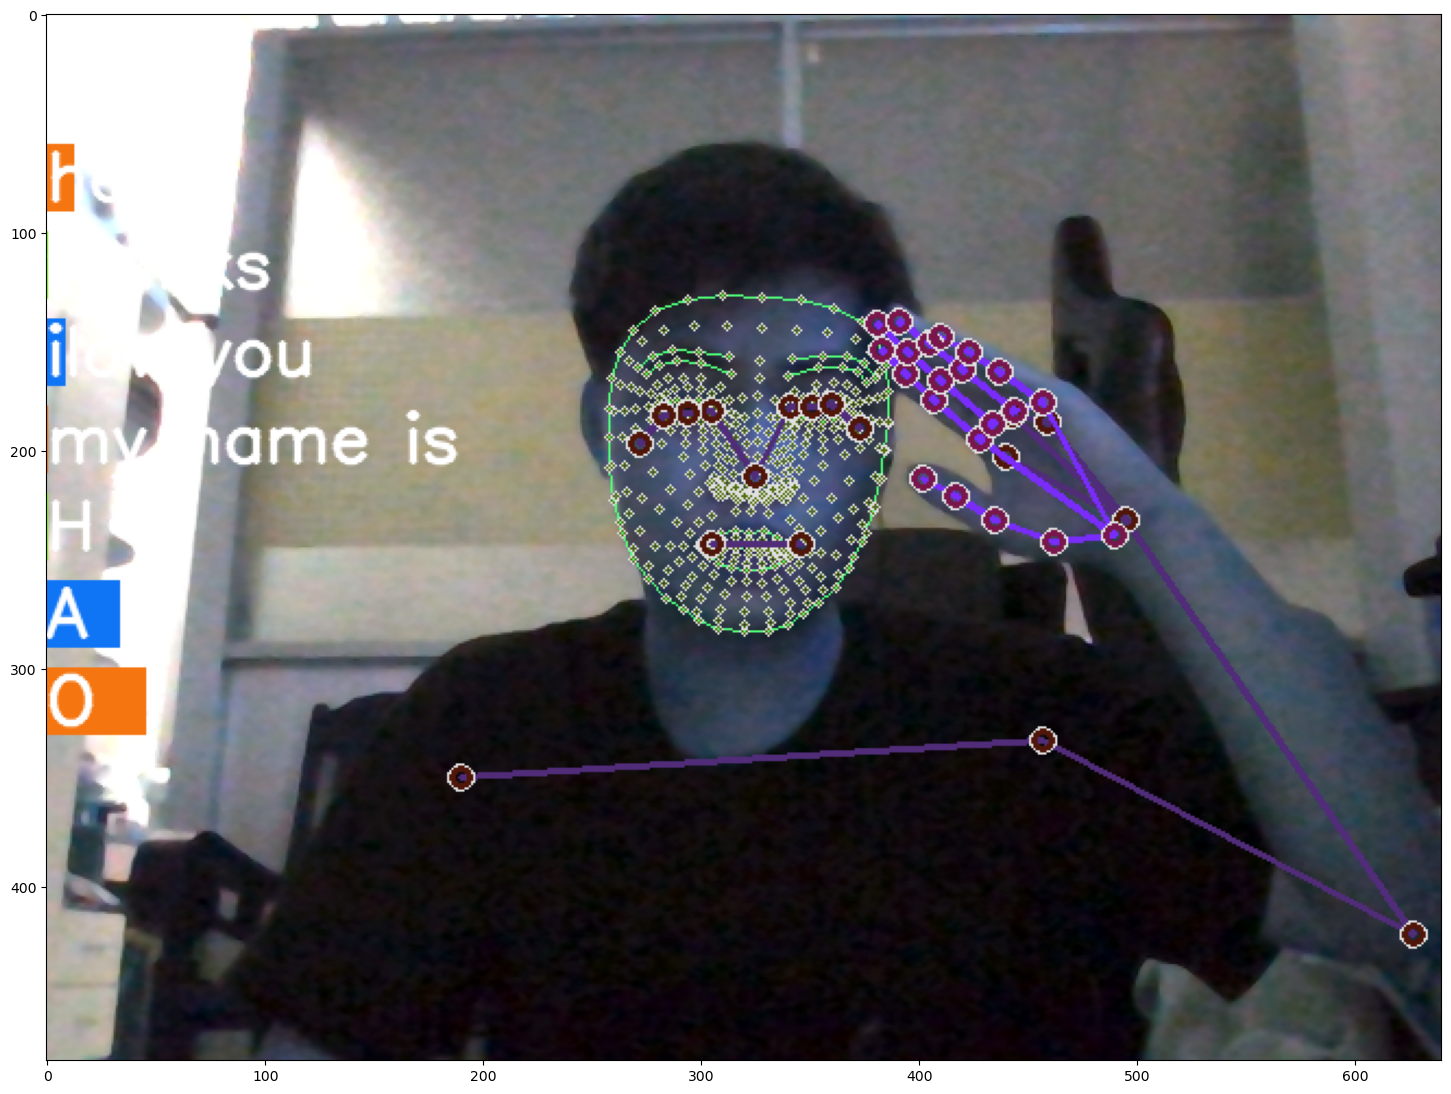

In [85]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [30]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.4


cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Make dectections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
         # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence = sequence[:30]
                
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
        

        # Show
        cv2.imshow("OpenCV Feed", image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 25ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1

1/1 [==============================] - 0s 24ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1

1/1 [==============================] - 0s 22ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
D


In [33]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.5

# Set up voice 
engine = pyttsx3.init()
engine.setProperty("rate", 120)
voices = engine.getProperty("voices")
engine.setProperty("voice", voices[1].id)

myindex = 0
time = 0
memory = 0
text = " "
dif = 0

cap = cv2.VideoCapture(0)
# Dat mo hinh mediapipe
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Doc nguon cap du lieu
        ret, frame = cap.read()
        
        # Thuc hien tim kiem
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Ve luoi than kinh
        draw_styled_landmarks(image, results)
        
         # 2. Du doan logic
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence = sequence[:30]
                
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
        
       #3. Du doan hanh dong
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                        
                else:
                        sentence.append(actions[np.argmax(res)])
        
            text = actions[np.argmax(res)]
            
            if len(sentence) > 5: 
                sentence = sentence[-5:]
                
        # image = prob_viz(res, actions, image, colors)
            
            
        #  Chuyen thanh giong noi
            # Phat hien thay doi 
            myindex = np.argmax(res) + 1
            dif = memory - myindex
            if dif != 0:
                time = 0
            
            # Phat giong noi
            if text == actions[np.argmax(res)]:
                memory = myindex
                time += 1
                
                # Do chinh xac
                if time == 20:
                    
                # Luu vao file
                    f = open(pathp, 'a')
                    if len(text) == 1:
                        f.write(text)
                    else:    
                        f.write(text + '\n')
                    f.close()
                    
               
                    f = open(pathp)
                    mytext = f.read()
                    engine.say(mytext)
                    engine.runAndWait()
                    f.close()
                    
                # Xoa noi dung file
                    f = open(pathp, 'r+')
                    f.truncate(0)
                    f.close()
                    continue
                    
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
    
        # Hien len man hinh cua camera
        cv2.imshow("OpenCV Feed", image)
        
        # Tat cammera bang nut 'q' va xoa file
        if cv2.waitKey(1) & 0xFF == ord('q'):
            # Delete the content of file
            f = open(pathp, 'r+')
            f.truncate(0)
            f.close()
            break
            
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 27ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
B
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1

1/1 [==============================] - 0s 24ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1

1/1 [==============================] - 0s 24ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
A
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1

In [31]:
cap.release()
cv2.destroyAllWindows()

In [50]:
np.expand_dims(X_test[0], axis=1).shape

(30, 1, 1662)

In [82]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 22ms/step


array([[6.342379e-06, 9.999937e-01, 8.937326e-15]], dtype=float32)

In [80]:
res[np.argmax(res)] > threshold

True

hahahah
